# Malaria infected cells recognition
## Convolutional Neural Networks Practice with Keras/Tensorflow

_

**Reconocimiento de células infectadas con malaria**

**Proyecto de práctica de CNN con Keras/Tensorflow**

---

# Data | Datos

**The Malaria dataset contains a total of 27,558 cell images with equal instances of parasitized and uninfected cells from the thin blood smear slide images of segmented cells.**

The dataset contains 2 folders:

Infected
Uninfected

__


El datast de Malaria contiene un total de 27,558 imágenes de células con instancias iguales de células parasitadas y no infectadas de las imágenes de diapositivas de frotis de sangre delgada de células segmentadas.

_


### Setting Path | Ajustes de los directorios

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.image import imread

In [14]:
data_dir = 'C:\\Users\\USER\\Documents\\Courses\\Tensorflow\\cell_images\\cell_images'

In [10]:
train_path = data_dir + '\\train\\'
test_path = data_dir + '\\test\\'

In [18]:
os.listdir(train_path + 'parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [23]:
para_cell = train_path + 'parasitized\\' + 'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [25]:
imread(para_cell).shape

(148, 142, 3)

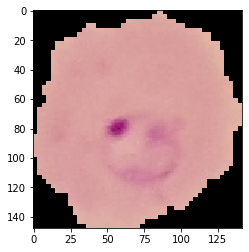

In [26]:
plt.imshow(imread(para_cell))

In [36]:
uninfected_cell = train_path + 'uninfected\\' + 'C100P61ThinF_IMG_20150918_144104_cell_128.png'
uninfected_cell = imread(uninfected_cell)

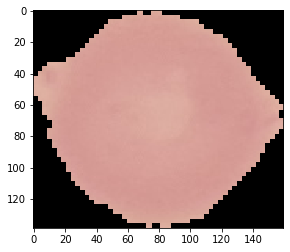

In [37]:
plt.imshow(uninfected_cell)

In [38]:
len(os.listdir(train_path + 'parasitized'))

12480

In [39]:
len(os.listdir(train_path + 'uninfected'))

12480

In [40]:
len(os.listdir(test_path + 'parasitized'))

1300

In [41]:
len(os.listdir(test_path + 'uninfected'))

1300

**Paths are set**

_


---

## Preprocessing | Preprocesamiento

### Average size | Tamaño promedio


**Since we can't train the CNN with images of multiple sizes, we must reshape the images to a fixed size, to do that we use a loop to get the dimensions of the images and average it.**

Dado que no podemos entrenar la CNN con imágenes de varios tamaños, debemos remodelar las imágenes a un tamaño fijo, para hacer eso, usamos un bucle para obtener las dimensiones de las imágenes y promediarlas.

In [43]:
dim1 = []
dim2 = []

for image_file in os.listdir(test_path + 'uninfected'):
    img = imread(test_path + 'uninfected\\' + image_file)
    d1, d2, colors = img.shape
    dim1.append(d1)
    dim2.append(d2)
    

In [46]:
len(dim1)

1300

In [47]:
len(dim2)

1300

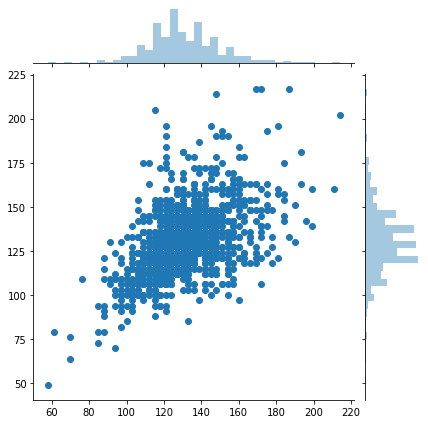

In [50]:
sns.jointplot(dim1, dim2)

In [48]:
np.mean(dim1)

130.92538461538462

In [49]:
np.mean(dim2)

130.75

**Both dimensions are around 130, so we set our final image shape**

Ambas dimensiones se encuentran alrededor de 130, así que fijamos la forma final de las imágenes

In [51]:
image_shape = (130, 130, 3)

_



### Image Manipulation | Manipulación de la imagen

In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [53]:
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest')

In [57]:
para_img= imread(para_cell)

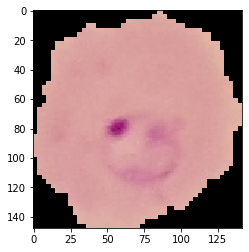

In [58]:
plt.imshow(para_img)

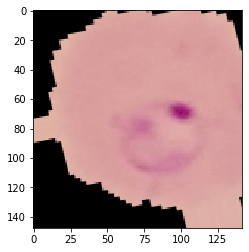

In [68]:
plt.imshow(image_gen.random_transform(para_img))

In [70]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [71]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


---

## Model Training | Entrenamiento del modelo

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten

In [76]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [79]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)            

In [81]:
from tensorflow.keras.callbacks import EarlyStopping

In [82]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [83]:
batch_size = 16

### Image Data Generators 

In [85]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [87]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                              shuffle=False)

Found 2600 images belonging to 2 classes.


In [88]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [89]:
results = model.fit_generator(train_image_gen,
                             epochs=20,
                             validation_data=(test_image_gen),
                             callbacks=[early_stop])

C:\Users\USER\anaconda3\envs\tfenv\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
1560/1560 [==============================] - 462s 296ms/step - loss: 1.9222 - accuracy: 0.5851 - val_loss: 0.6861 - val_accuracy: 0.5377
Epoch 2/20
1560/1560 [==============================] - 453s 290ms/step - loss: 0.6840 - accuracy: 0.5578 - val_loss: 0.6805 - val_accuracy: 0.5662
Epoch 3/20
1560/1560 [==============================] - 307s 197ms/step - loss: 0.6833 - accuracy: 0.5680 - val_loss: 0.6792 - val_accuracy: 0.5635
Epoch 4/20
1560/1560 [==============================] - 306s 196ms/step - loss: 0.6794 - accuracy: 0.5746 - val_loss: 0.6762 - val_accuracy: 0.5804
Epoch 5/20
1560/1560 [==============================] - 297s 190ms/step - loss: 0.6772 - accuracy: 0.5900 - val_loss: 0.6837 - val_accuracy: 0.5742
Epoch 6/20
1560/1560 [==============================] - 302s 193ms/step - loss: 0.6877 - accuracy: 0.5753 - val_loss: 0.6750 - val_accuracy: 0.5838
Epoch 7/20
1560/1560 [==============================] - 311s 199ms/step - loss: 0.6728 - accuracy: 0.5919 - val_

In [94]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.871114,0.562465,0.686148,0.537692
1,0.682713,0.565991,0.680547,0.566154
2,0.681268,0.573804,0.679225,0.563462
3,0.677785,0.577610,0.676192,0.580385
4,0.677534,0.586065,0.683729,0.574231
5,0.679172,0.580054,0.675041,0.583846
6,0.674462,0.587627,0.671666,0.587692
7,0.393610,0.829514,0.187613,0.938846
8,0.205186,0.935732,0.194759,0.938462
9,0.188861,0.940099,0.180243,0.939231


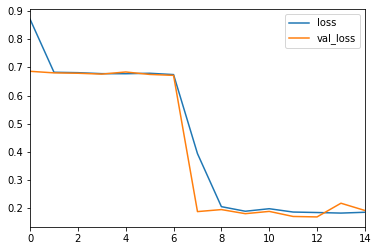

In [97]:
metrics[['loss','val_loss']].plot();

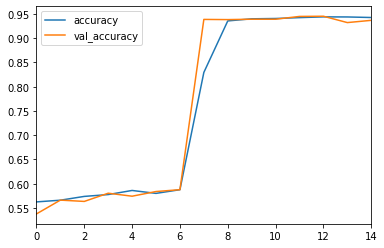

In [100]:
metrics[['accuracy', 'val_accuracy']].plot();

---

## Model Performance Evaluation | Evaluación del desempeño del modelo

In [101]:
pred = model.predict_generator(test_image_gen)

C:\Users\USER\anaconda3\envs\tfenv\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [102]:
pred

array([[0.04808322],
       [0.0027172 ],
       [0.00215104],
       ...,
       [0.9867616 ],
       [0.99024427],
       [0.98406804]], dtype=float32)

In [111]:
predictions = pred > 0.80
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [112]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [113]:
from sklearn.metrics import confusion_matrix, classification_report

In [114]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1300
           1       0.95      0.77      0.85      1300

    accuracy                           0.87      2600
   macro avg       0.88      0.87      0.87      2600
weighted avg       0.88      0.87      0.87      2600



In [115]:
print(confusion_matrix(test_image_gen.classes, predictions))

[[1251   49]
 [ 293 1007]]


### Prediction test on "new" image

**Since we already have a single image location we can use it to make our test**

_


**Prueba de predicción con una imagen "nueva"**

Dado que ya tenemos la ubicación de una sola imagen podemos usarla para hacer nuestra prueba


In [116]:
para_cell

'C:\\Users\\USER\\Documents\\Courses\\Tensorflow\\cell_images\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [117]:
from tensorflow.keras.preprocessing import image

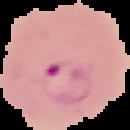

In [120]:
new_image = image.load_img(para_cell, target_size=image_shape)
new_image

In [122]:
new_image_array =  image.img_to_array(new_image)

In [124]:
new_image_array.shape

(130, 130, 3)

In [125]:
new_image_array.reshape(1,130,130,3)

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)

In [127]:
model.predict(new_image_array.reshape(1,130,130,3)) > 0.5

array([[False]])

In [131]:
model.predict(np.expand_dims(new_image_array, axis=0))

array([[0.00050971]], dtype=float32)

In [132]:
model.predict(new_image_array.reshape(1,130,130,3))

array([[0.00050971]], dtype=float32)

In [133]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

## The Model performed really well and made an accurate prediction

**El modelo se desempeño realmente bien e hizo una predicción precisa**